## ForceAtlas2

This notebook illustrates the embedding of a graph through the force-directed algorithm Force Atlas 2.



In [31]:
from IPython.display import SVG

In [32]:
import numpy as np

In [33]:
from sknetwork.data import karate_club, painters
from sknetwork.embedding.force_atlas import ForceAtlas2
from sknetwork.visualization import svg_graph, svg_digraph

### Graphs

In [34]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
labels = graph.labels

#### Embedding

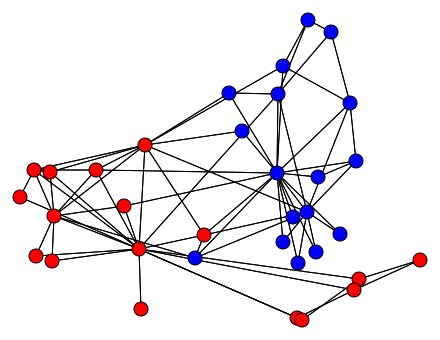

In [35]:
forceatlas2 = ForceAtlas2()
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding, labels=labels)
SVG(image)

### Settings

Here is presented the influences of the different settings proposed to the user on the graph's layout.

#### LinLog

Replace the linear attraction force with a logarithmic attraction force.

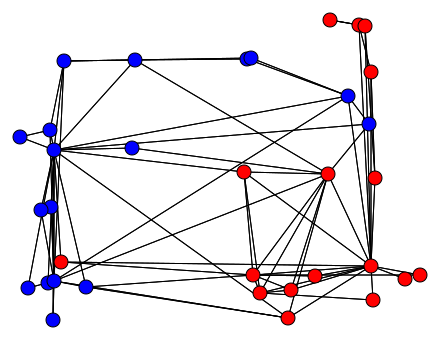

In [36]:
forceatlas2 = ForceAtlas2(lin_log = True)
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding, labels=labels)
SVG(image)

#### Scalling : repulsive and gravity force

Set the gravity and repulsion force constants (gravity_factor and repulsion_factor) to set the importance of each force in the layout. Keep values between 0.01 and 0.1.

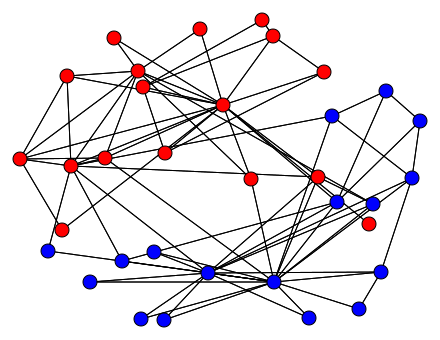

In [37]:
forceatlas2 = ForceAtlas2(gravity_factor = 0.1)
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding, labels=labels)
SVG(image)

#### Strong gravity

Set a gravity force that attracts more the distant nodes.
Warning : switching from regular mode to strong_gravity mode needs a readjustment of the scaling parameter.

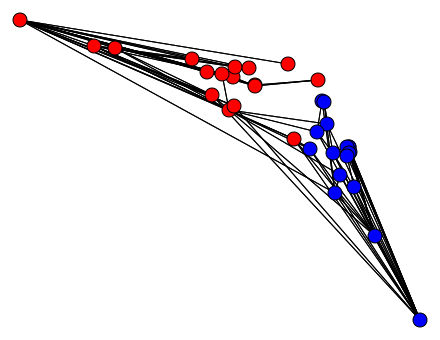

In [38]:
forceatlas2 = ForceAtlas2(strong_gravity = True, gravity_factor = 0.001, repulsive_factor = 0.1)
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding, labels=labels)
SVG(image)

#### Dissuade Hubs

Divide the attraction force by the degree of nodes. Hubs attract less and thus are pushed to the borders.

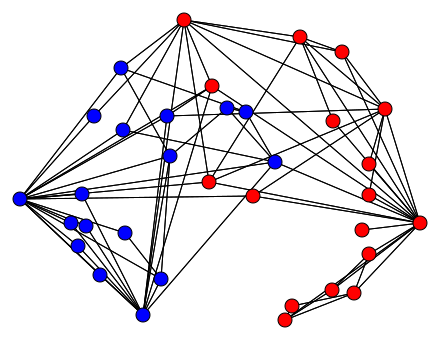

In [39]:
forceatlas2 = ForceAtlas2(no_hubs = True, gravity_factor = 0.01)
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding, labels=labels)
SVG(image)

#### Prevent overlapping

Modify the attraction and repulsion force to prevent the overlapping of the nodes.
Warning : does not work every time.

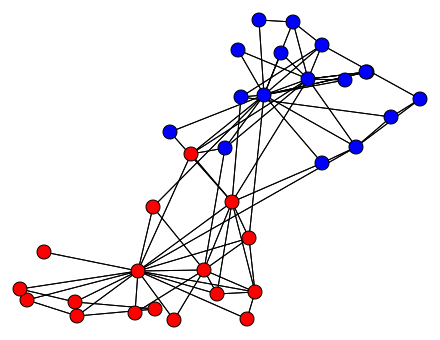

In [40]:
forceatlas2 = ForceAtlas2(no_overlapping = True)
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding, labels=labels)
SVG(image)

#### Tolerance

Set the amount of swinging tolerated. Lower gives less speed and more precision.

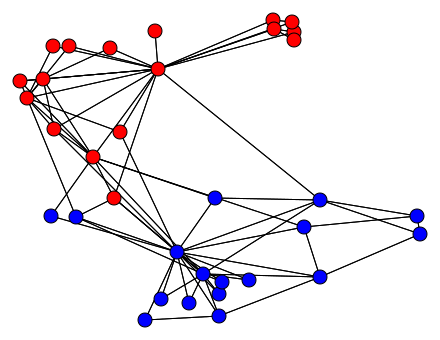

In [41]:
forceatlas2 = ForceAtlas2(tolerance = 1.5)
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding, labels=labels)
SVG(image)

#### Barnes Hut Approximation

When activiated, uses an approximate computation of the repulsion force to change the complexity from $O(n^2)$ to $O(n\log n)$.
Increasing theta, gives a lower precision but a greater speed

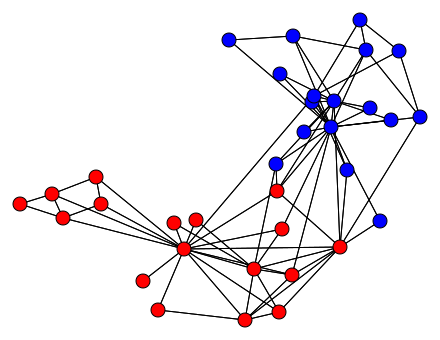

In [42]:
forceatlas2 = ForceAtlas2(barnes_hut = True, theta = 1)
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding, labels=labels)
SVG(image)

### Graph visualization for multi-dimensional computation

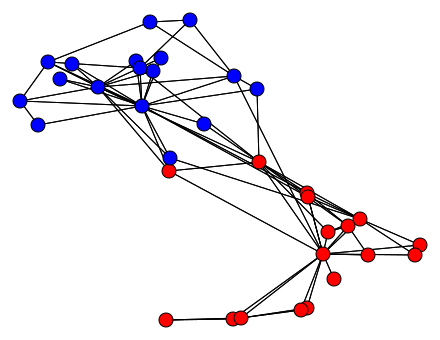

In [43]:
forceatlas2 = ForceAtlas2(n_components = 3)
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding[:,:2], labels=labels)
SVG(image)

### Digraphs

In [44]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names

#### Embedding

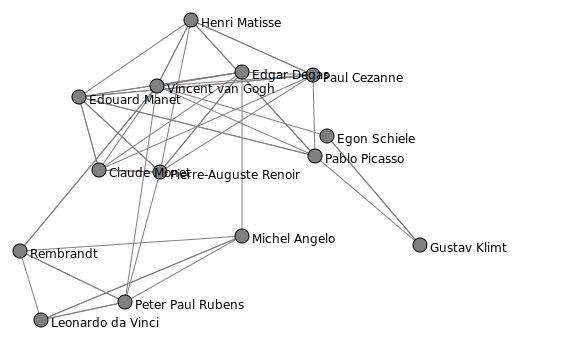

In [45]:
forceatlas2 = ForceAtlas2()
embedding = forceatlas2.fit_transform(adjacency)
image = svg_graph(adjacency, embedding, names=names)
SVG(image)